# Project 5
Author: Tommy Phung <br>
Target: Video Game Invenstors

In [1]:
import pandas as pd
from functions import data_cleaning as dc 

In [2]:
df = pd.read_csv('datasets/backloggd_games.csv', index_col= 0)
goty_df = pd.read_excel('datasets/Sample GOTY.xlsx')
ranked_df = pd.read_csv('datasets/vgsales.csv')

In [3]:
df['top'] = 0
df.loc[df['Title'].isin(ranked_df[ranked_df.Global_Sales >= 1].Name.values), 'top'] = 1

## Data Preperations

Before analysising the dataset, it needs to be cleaned for any missing data or any data that isn't needed for the project. <br>
Unnecessary columns are removed from the dataset that would not be used. **Wishlist, Playing and Backlog** are the number of people that want the game, is currently playing or planning on playing the selected game. This is subjective and doesn't indicate whether the game is good or bad. The column Plays, which are people that have played the game can give insight on actual players for the game. <br>

**TBD or To Be Determined** are games with not release date yet meaning that the game is too new to be analysis yet. 
Any duplicates are also removed. A thing to note is that games get rereleases so duplicates in titles are handled differently. 

The number of players in the columns **Plays and Reviews** are changed to integers for comparison. The letter **K**, stands for the thousands and changed accordingly. 

In [4]:
df.drop(['Wishlist', 'Backlogs','Playing', 'Lists'], axis = 1, inplace= True)
df.drop(df[df['Release_Date'] == 'TBD'].index, inplace= True)
df.drop_duplicates(inplace= True)    ### 

df['Plays'] = df['Plays'].apply(dc.value_to_float)
df['Reviews'] = df['Reviews'].apply(dc.value_to_float)

df.Release_Date = df.Release_Date.apply(lambda x: int(x[-4:]))

df.drop(df[df.Rating.isna()].index, inplace= True)
df.reset_index(drop= True, inplace= True)

## Data Distribution

While looking at the dataset, there is a couple of things to note in the distribution. For the number of ratings, it follows a normal distribution not including that the number of games that doesn't have a rating. 

**16.6 %** of the games were a developers **single game**. This could be misleading as some **developers changes names** or get **absorbed by companies** that would change what the game developers havppens to be. We would assume that this doesn't make a majority of games for now unless the number of games makes an impact. <br>
**15.1 %** of the games **doesn't have a game developer listed**. There is a number of reason other than missing developer name. **Newer unknown games** would have individual name rather than actual company name. This could be good to note the potential of these games since **not all good games are known or created by big companies.** 


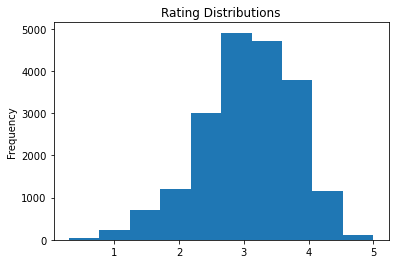

In [5]:
### Rating Distrbution 
df[df.Rating >= 0].Rating.plot(kind = 'hist', title = 'Rating Distributions', xlabel = 'Rating', sharex = False);

In [6]:
df.Genres = df.Genres.apply(dc.convert_to_list)
df.Developers = df.Developers.apply(dc.convert_to_list)

In [7]:
dev_df = pd.concat([df.Title, pd.get_dummies(df['Developers'].explode(),drop_first= True).groupby(level=0).sum(), df[['top']]], axis= 1)
genre_df = pd.concat([df.Title, pd.get_dummies(df['Genres'].explode(),drop_first= True).groupby(level=0).sum(), df[['top']]], axis= 1)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = genre_df[genre_df.columns[1:-1]]
y =  genre_df.top
X_train, X_test, y_train, y_test = train_test_split(X, y)
                                                            
classifier = DecisionTreeClassifier(random_state=10)  

classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=10)

In [ ]:
feature_list = []
for name, value in zip(classifier.feature_names_in_, classifier.feature_importances_):
    feature_list.append((name, round(value*100, 2)))
    

In [16]:
sorted(feature_list, key= lambda x: x[1], reverse= True)

[('Indie', 18.35),
 ('Adventure', 8.09),
 ('Simulator', 7.05),
 ('Sport', 6.99),
 ('RPG', 6.83),
 ('Strategy', 5.73),
 ('Puzzle', 5.7),
 ('Fighting', 5.63),
 ('Platform', 5.35),
 ('Shooter', 5.04),
 ('Racing', 5.0),
 ('Arcade', 4.71),
 ('Brawler', 3.83),
 ('Tactical', 2.33),
 ('Turn Based Strategy', 1.91),
 ('Quiz/Trivia', 1.58),
 ('Point-and-Click', 1.46),
 ('Real Time Strategy', 1.28),
 ('Card & Board Game', 1.12),
 ('Music', 0.93),
 ('Visual Novel', 0.77),
 ('Pinball', 0.34),
 ('MOBA', 0.01)]

In [10]:
test_df = pd.concat([X_test.reset_index(), pd.Series(classifier.predict(X_test), name = 'Pred')], axis= 1)

In [14]:
test_df.loc[test_df['Pred'] == 1]

,index,Adventure,Arcade,Brawler,Card & Board Game,Fighting,Indie,MOBA,Music,Pinball,...,Racing,Real Time Strategy,Shooter,Simulator,Sport,Strategy,Tactical,Turn Based Strategy,Visual Novel,Pred
112,1780,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
987,3225,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1334,1721,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1559,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1563,1916,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1842,1364,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2147,4365,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2320,6571,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2365,10857,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
2735,4421,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1


In [12]:
df.iloc[test_df.loc[test_df['Pred'] == 1]['index'].values]

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Reviews,top
1780,Yakuza 4,2010,"[Ryu ga Gotoku Studios, Sega]",Yakuza 4 is the fourth game in Sega's crime dr...,['PlayStation 3'],"[Adventure, Brawler, RPG, Simulator, Sport]",3.7,1500.0,0.0,0
3225,Sonic Gems Collection,2005,"[Sonic Team, Sega]",Sonic Gems Collection is a 2005 compilation of...,"['Nintendo GameCube', 'PlayStation 2']","[Fighting, Platform, Racing]",3.5,0.0,0.0,0
1721,Yakuza 3,2009,"[CS1 Team, Sega]",Introducing the next cinematic chapter in the ...,['PlayStation 3'],"[Adventure, Brawler, Quiz/Trivia, RPG, Simulator]",3.4,1500.0,0.0,1
1981,Professor Layton and the Miracle Mask,2011,"[LEVEL-5, Nintendo]",Professor Layton's first adventure on the Nint...,['Nintendo 3DS'],"[Point-and-Click, Puzzle, Visual Novel]",3.7,1400.0,0.0,0
1916,Professor Layton and the Last Specter,2009,"[LEVEL-5, Nintendo]",Last Specter is the fourth game in the Profess...,['Nintendo DS'],"[Point-and-Click, Puzzle, Visual Novel]",3.6,1700.0,0.0,1
1364,Honkai Impact 3rd,2016,"[miHoYo, HoYoverse]",Honkai Impact 3 follows Kiana and her team of ...,"['Windows PC', 'Android', 'iOS']","[Adventure, Brawler, Fighting, RPG, Simulator,...",3.4,0.0,0.0,0
4365,Banjo-Kazooie: Grunty's Revenge,2003,"[THQ, Rare]","Gruntilda is back, and it's up to Banjo and Ka...","['Mobile', 'Game Boy Advance']","[Adventure, Platform, Quiz/Trivia]",2.9,0.0,0.0,0
6571,Twisted Metal 4,1999,"[Sony Computer Entertainment, 989 Studios]",Twisted Metal 4 is the fourth installment in t...,['PlayStation'],"[Fighting, Racing, Shooter]",3.3,0.0,0.0,1
10857,Fear Effect Sedna,2018,"[Forever Entertainment S. A., Sushee]","""Fear Effect Sedna is a pausable real-time tac...","['Windows PC', 'PlayStation 4', 'Xbox One', 'N...","[Adventure, Puzzle, RPG, Shooter, Strategy, Ta...",1.9,0.0,0.0,0
4421,Insaniquarium Deluxe,2004,"[Flying Bear Entertainment, PopCap Games]",Dive into wild arcade action as you feed fish ...,['Windows PC'],"[Puzzle, Shooter, Simulator, Strategy]",3.6,0.0,0.0,0


In [17]:
df.top.value_counts()

0    18494
1     1373
Name: top, dtype: int64

In [18]:
dev_df

,Title,"""C's ware""","""C's ware"", 'Himeya Soft","""C's ware"", 'Imagineer","""Chilla's Art""","""Crispy's!"", 'BANDAI NAMCO Games Inc","""DON'T NOD""","""DON'T NOD"", 'PortaPlay","""DON'T NOD"", 'Square Enix","""Dragon's Eye Productions, Inc""",...,旋風野郎,未完童話,游艺春秋,猫薄荷制作组,知行合一,赤瞳大白猫,迷糊的安安,青春18金魚,高考恋爱委员会,top
0,Elden Ring,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Legend of Zelda: Breath of the Wild,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hades,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hollow Knight,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Undertale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19862,Planet Crafter,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19863,FIFA Manager 14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19864,Super Widget,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19865,Pizza Delivery Boy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
